#Set-up

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from pathlib import Path
import io

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [ ]:
#reading the file from the drive
# Download a file based on its file ID.
# https://drive.google.com/file/d/1XsRqaT1TUUOs4zOI6Lr6tPTZ3WGj0Dav/view?usp=sharing
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

#https://drive.google.com/file/d/1tSAuWjJ93Y_x0YNzsqAxXjs4o45DVm_E/view?usp=sharing
file_id = '1tSAuWjJ93Y_x0YNzsqAxXjs4o45DVm_E'

file_obj = drive.CreateFile({'id': file_id})
content_string = file_obj.GetContentString()

covid = pd.read_csv(io.StringIO(content_string))
covid

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,All Ages,974282.0,7520550.0,855731.0,504882.0,10684.0,1334231.0,NaN
1,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,Under 1 year,242.0,41777.0,495.0,28.0,28.0,736.0,NaN
2,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,0-17 years,933.0,74176.0,1460.0,252.0,204.0,2342.0,NaN
3,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,1-4 years,113.0,7791.0,293.0,29.0,70.0,447.0,NaN
4,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,5-14 years,296.0,12438.0,424.0,96.0,82.0,705.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85369,03/23/2022,03/01/2022,03/19/2022,By Month,2022.0,3.0,Puerto Rico,Female,50-64 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
85370,03/23/2022,03/01/2022,03/19/2022,By Month,2022.0,3.0,Puerto Rico,Female,55-64 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
85371,03/23/2022,03/01/2022,03/19/2022,By Month,2022.0,3.0,Puerto Rico,Female,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
85372,03/23/2022,03/01/2022,03/19/2022,By Month,2022.0,3.0,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
covid[(covid['Age Group'] == 'All Ages') & (covid['Sex'] == 'All Sexes')]['Age Group'].value_counts()


All Ages    1674
Name: Age Group, dtype: int64

# EDA


In [ ]:
covidAll = covid[(covid['Age Group'] == 'All Ages') & (covid['Sex'] == 'All Sexes')][1:]  #removing all US row
covidAll

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
51,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,Alabama,All Sexes,All Ages,18872.0,143665.0,12946.0,6626.0,192.0,25358.0,NaN
102,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,Alaska,All Sexes,All Ages,1201.0,11769.0,1052.0,700.0,17.0,1569.0,NaN
153,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,Arizona,All Sexes,All Ages,26809.0,176130.0,23792.0,15915.0,181.0,34856.0,NaN
204,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,Arkansas,All Sexes,All Ages,10933.0,85871.0,9843.0,5445.0,127.0,15445.0,NaN
255,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,California,All Sexes,All Ages,92729.0,718334.0,92258.0,55460.0,892.0,130391.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85119,03/23/2022,11/01/2021,11/30/2021,By Month,2021.0,11.0,Puerto Rico,All Sexes,All Ages,28.0,2612.0,261.0,18.0,NaN,277.0,One or more data cells have counts between 1-9...
85170,03/23/2022,12/01/2021,12/31/2021,By Month,2021.0,12.0,Puerto Rico,All Sexes,All Ages,51.0,2810.0,334.0,33.0,NaN,357.0,One or more data cells have counts between 1-9...
85221,03/23/2022,01/01/2022,01/31/2022,By Month,2022.0,1.0,Puerto Rico,All Sexes,All Ages,0.0,0.0,0.0,0.0,0.0,0.0,NaN
85272,03/23/2022,02/01/2022,02/28/2022,By Month,2022.0,2.0,Puerto Rico,All Sexes,All Ages,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
#getting group by month data for covidAll

covidAll_monthly = covidAll[covidAll['Group'] == 'By Month']
covidAll_monthly

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
11016,03/23/2022,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,All Sexes,All Ages,5.0,264658.0,17909.0,3.0,2125.0,20036.0,NaN
11067,03/23/2022,02/01/2020,02/29/2020,By Month,2020.0,2.0,United States,All Sexes,All Ages,24.0,244928.0,15738.0,10.0,2371.0,18122.0,NaN
11118,03/23/2022,03/01/2020,03/31/2020,By Month,2020.0,3.0,United States,All Sexes,All Ages,7163.0,269779.0,22468.0,3335.0,2437.0,28605.0,NaN
11169,03/23/2022,04/01/2020,04/30/2020,By Month,2020.0,4.0,United States,All Sexes,All Ages,65506.0,322358.0,46406.0,28377.0,1237.0,83960.0,NaN
11220,03/23/2022,05/01/2020,05/31/2020,By Month,2020.0,5.0,United States,All Sexes,All Ages,38312.0,280493.0,29002.0,15923.0,126.0,51497.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85119,03/23/2022,11/01/2021,11/30/2021,By Month,2021.0,11.0,Puerto Rico,All Sexes,All Ages,28.0,2612.0,261.0,18.0,NaN,277.0,One or more data cells have counts between 1-9...
85170,03/23/2022,12/01/2021,12/31/2021,By Month,2021.0,12.0,Puerto Rico,All Sexes,All Ages,51.0,2810.0,334.0,33.0,NaN,357.0,One or more data cells have counts between 1-9...
85221,03/23/2022,01/01/2022,01/31/2022,By Month,2022.0,1.0,Puerto Rico,All Sexes,All Ages,0.0,0.0,0.0,0.0,0.0,0.0,NaN
85272,03/23/2022,02/01/2022,02/28/2022,By Month,2022.0,2.0,Puerto Rico,All Sexes,All Ages,0.0,0.0,0.0,0.0,0.0,0.0,NaN


#Plotting

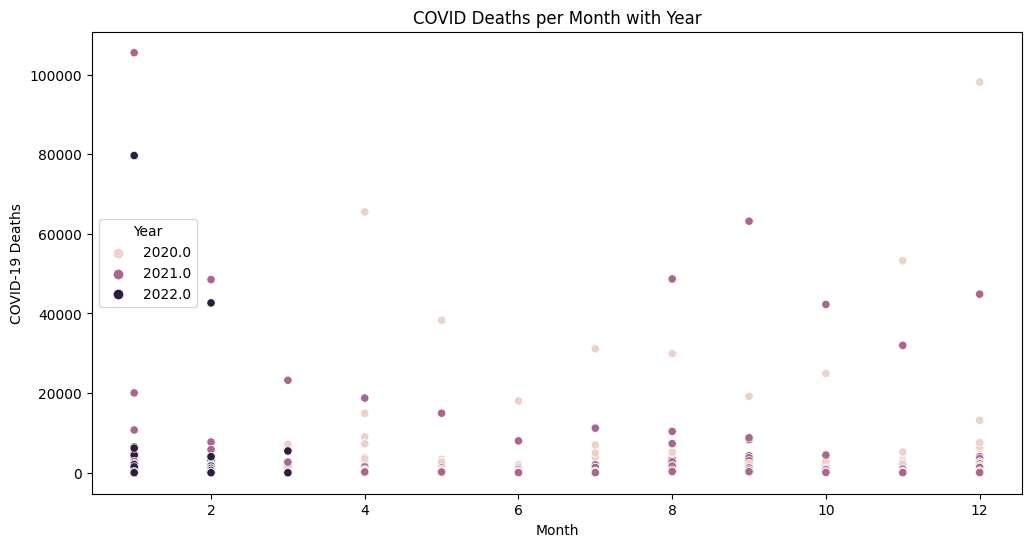

In [ ]:
#Plotting the data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=covidAll_monthly, x='Month', y='COVID-19 Deaths', hue='Year')

plt.title('COVID Deaths per Month with Year')
plt.xlabel('Month')
plt.ylabel('COVID-19 Deaths')
plt.legend(title='Year')

# Show the plot
plt.show()

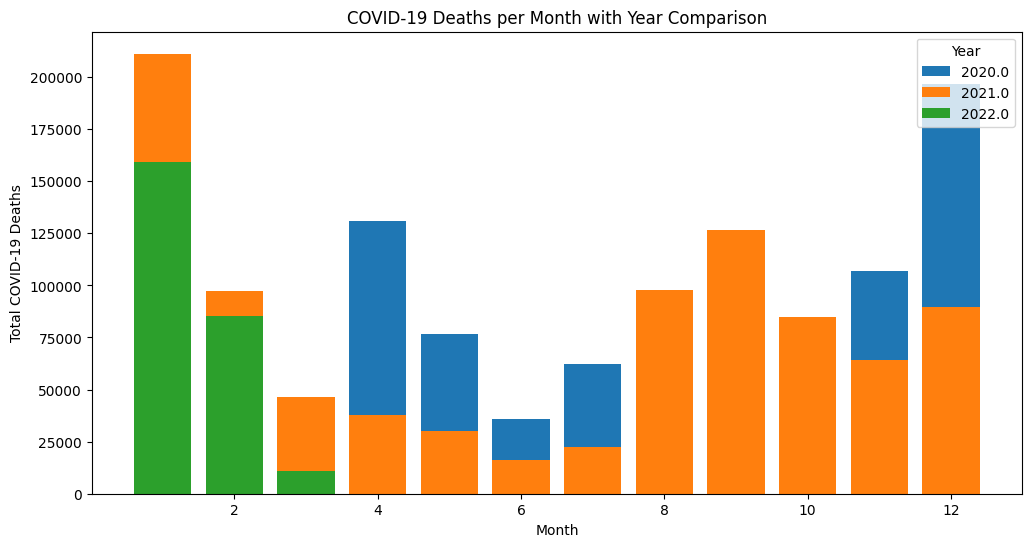

In [ ]:
grouped_data = covidAll_monthly.groupby(['Year', 'Month'])['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(12, 6))
for year, group in grouped_data.groupby('Year'):
    plt.bar(group['Month'], group['COVID-19 Deaths'], label=year)

plt.title('COVID-19 Deaths per Month with Year')
plt.xlabel('Month')
plt.ylabel('Total COVID-19 Deaths')
plt.legend(title='Year', loc='upper right')

plt.show()

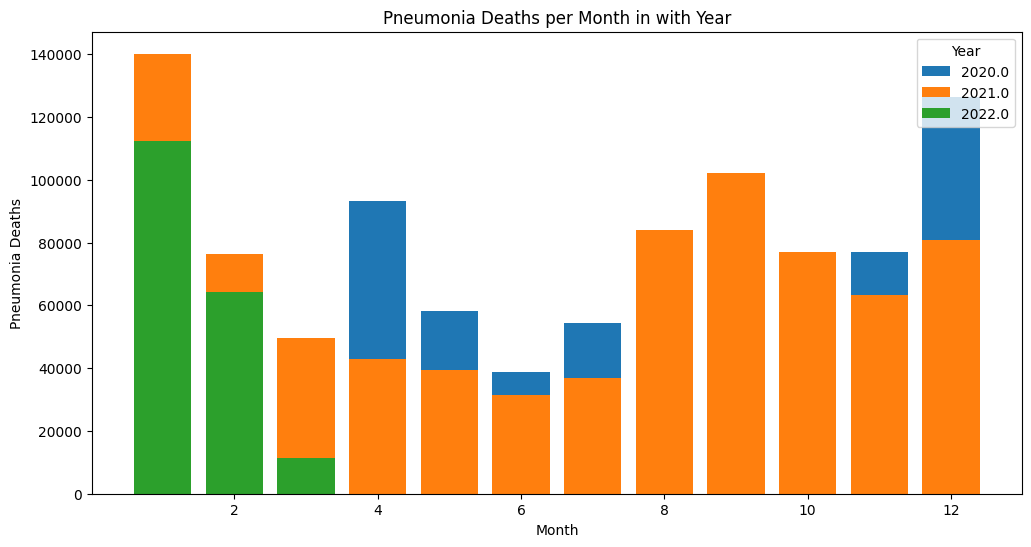

In [ ]:
plt.figure(figsize=(12, 6))
grouped_data2 = covidAll_monthly.groupby(['Year', 'Month'])['Pneumonia Deaths'].sum().reset_index()
for year, group in grouped_data2.groupby('Year'):
  plt.bar(group['Month'], group['Pneumonia Deaths'], label=year)

plt.title('Pneumonia Deaths per Month in with Year')
plt.xlabel('Month')
plt.ylabel('Pneumonia Deaths')
plt.legend(title='Year', loc='upper right')

plt.show()

# Year wise Graphs of Covid and Pneumonia Deaths!

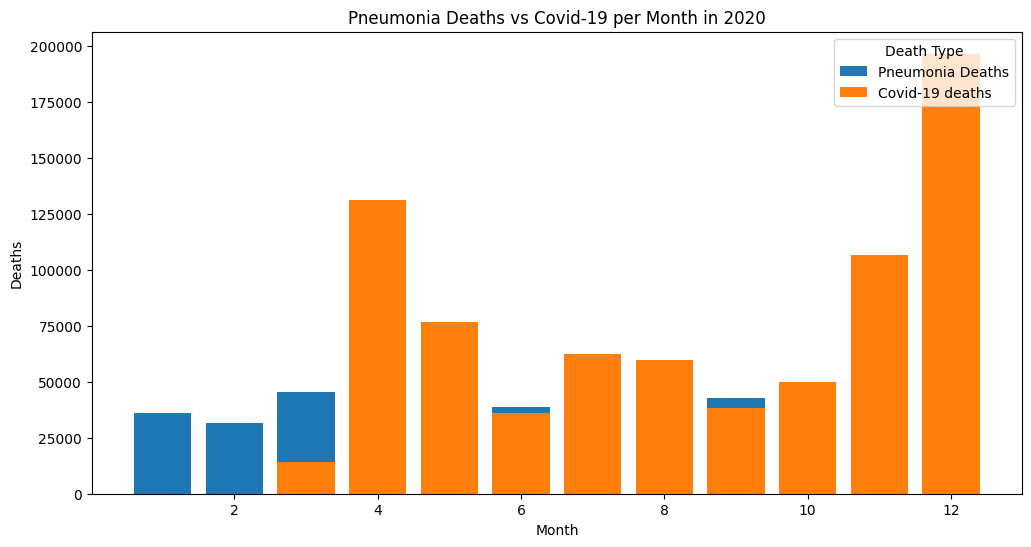

In [ ]:
# Year 2020
plt.figure(figsize=(12, 6))
for year, group in grouped_data2.groupby('Year'):
  if (year == 2020):
    plt.bar(group['Month'], group['Pneumonia Deaths'], label='Pneumonia Deaths')

for year, group in grouped_data.groupby('Year'):
  if (year == 2020):
    plt.bar(group['Month'], group['COVID-19 Deaths'], label='Covid-19 deaths')

plt.title('Pneumonia Deaths vs Covid-19 per Month in 2020')
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.legend(title='Death Type', loc='upper right')

plt.show()

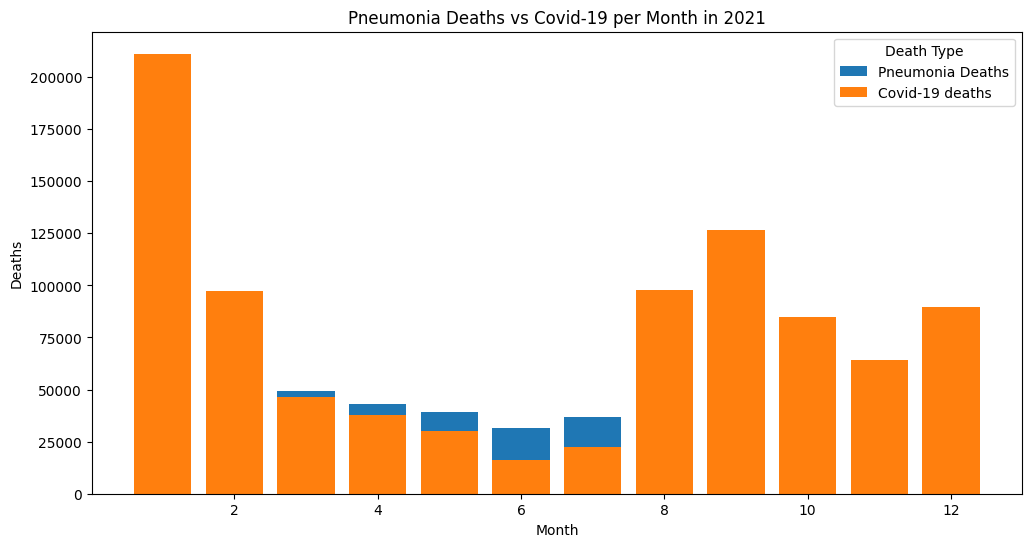

In [ ]:
# Year 2021
plt.figure(figsize=(12, 6))
for year, group in grouped_data2.groupby('Year'):
  if (year == 2021):
    plt.bar(group['Month'], group['Pneumonia Deaths'], label='Pneumonia Deaths')

for year, group in grouped_data.groupby('Year'):
  if (year == 2021):
    plt.bar(group['Month'], group['COVID-19 Deaths'], label='Covid-19 deaths')

plt.title('Pneumonia Deaths vs Covid-19 per Month in 2021')
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.legend(title='Death Type', loc='upper right')

plt.show()

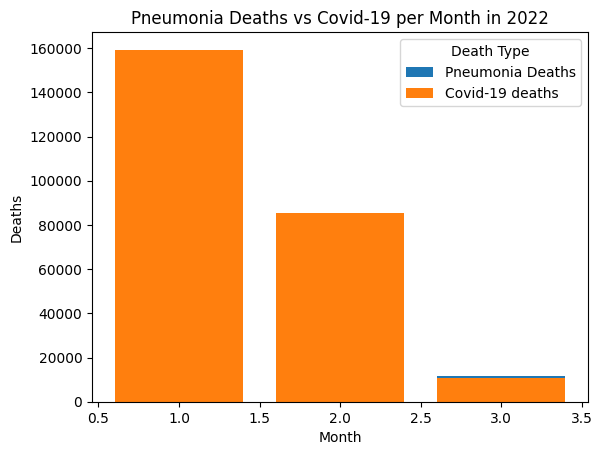

In [ ]:
# Year 2022
# plt.figure(figsize=(12, 6))
for year, group in grouped_data2.groupby('Year'):
  if (year == 2022):
    plt.bar(group['Month'], group['Pneumonia Deaths'], label='Pneumonia Deaths')

for year, group in grouped_data.groupby('Year'):
  if (year == 2022):
    plt.bar(group['Month'], group['COVID-19 Deaths'], label='Covid-19 deaths')

plt.title('Pneumonia Deaths vs Covid-19 per Month in 2022')
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.legend(title='Death Type', loc='upper right')

plt.show()

In [ ]:
# covid[covid['Sex'] == 'All Sexes']['Sex'].value_counts()

All Sexes    28458
Name: Sex, dtype: int64

In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  plt.title('Total deaths vs Pneumonia Deaths from Jan 1 2020 to 19th March 2022')
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(covid, *['Total Deaths', 'Pneumonia Deaths'], **{})

chart

<Figure size 600x600 with 0 Axes>

In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  plt.title('Total deaths vs Covid Deaths from Jan 1 2020 to 19th March 2022')
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(covid, *['Total Deaths','COVID-19 Deaths' ], **{})
chart

<Figure size 600x600 with 0 Axes>

In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(covid, *['Month', 'COVID-19 Deaths'], **{})
chart

<Figure size 600x600 with 0 Axes>